In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib as mpl

register_matplotlib_converters()

# File locations
#----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/jun_to_sept_2021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'


In [2]:
# Load the df 
#-------------
oxaria2_gases = pd.read_feather(the_gases+'oxaria2_gases_gf_oct.ftr').set_index(['tag','rec'])


FileNotFoundError: [Errno 2] No such file or directory: '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/jun_to_sept_2021/oxaria2_gases_gf_oct.ftr'

In [5]:
oxaria2_gases.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25337336 entries, ('scs-bgx-550', Timestamp('2020-06-01 00:00:08+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2020-10-29 16:55:47+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   val.no2.wev  float32
 1   val.no2.cnc  float32
 2   val.no2.aev  float32
 3   val.no2.wec  float32
 4   val.sht.hmd  float32
 5   val.sht.tmp  float32
 6   name         object 
dtypes: float32(6), object(1)
memory usage: 1.6+ GB


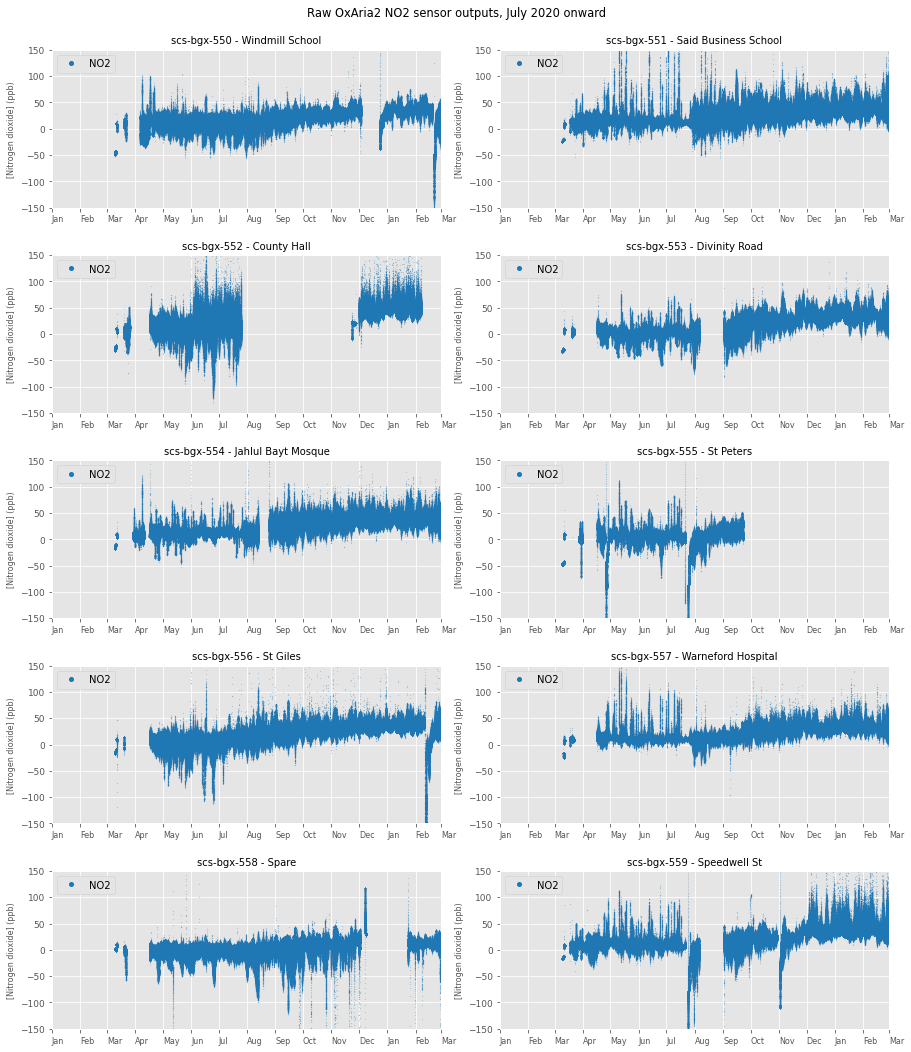

In [5]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_gases.iloc[:, [1, 6]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria2 NO2 sensor outputs, July 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.no2.cnc', c='tab:blue',linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, \
             legend=True,zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-150, 150)
    ax.set_ylabel('[Nitrogen dioxide] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left') 
    
#plt.savefig(pngs+'oxaria2_no2_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


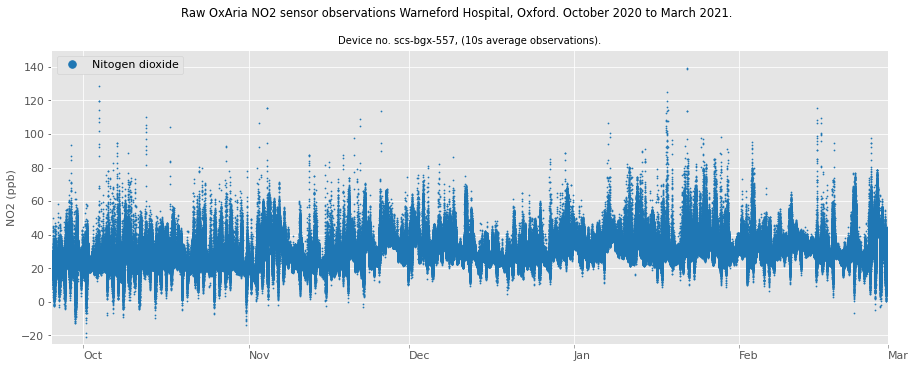

In [39]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_gases.query('tag == "scs-bgx-557"')

plt.style.use('fast')
# plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 9, 25)
end_date = dt.datetime(2021, 3, 1)

fig, axes = plt.subplots(nrows=1,
                         ncols=1,
                         sharex=False,
                         sharey=False,
                         figsize=(15, 6))
#axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria NO2 sensor observations Warneford Hospital, Oxford. October 2020 to March 2021.',
             fontsize=11.5,
             y=0.98)

for tag, dat in df.groupby('tag'):
    ax = axes
    dat.reset_index(level=0, inplace=True)
    t_name = list(dat['name'].unique())[0]
    dat.plot(y='val.no2.cnc',
             c='tab:blue',
             linewidth=0.5,
             marker='o',
             ms=0.75,
             ls='',
             label='Nitogen dioxide',
             ax=ax,
             legend=True,
             zorder=1)

    ax.set_title(''.join('Device no. ' + tag + ', (10s average observations).'), fontsize=10)
    ax.tick_params(axis='x', which='major', labelrotation=0,width=0.5)
    ax.tick_params(axis='both', labelsize=11)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-25, 150)
    ax.set_ylabel('NO2 (ppb)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    ax.legend(markerscale=10, frameon=True, framealpha=0.99, loc='upper left', fontsize=11)

plt.savefig(pngs+'no2_warneford_suzanne.png')
plt.show()

In [40]:
df.loc[:,['val.no2.cnc']].describe().to_csv(pngs+'warneford_no2_summary.csv')

In [41]:
df.loc[:,['val.no2.cnc']].describe()

,val.no2.cnc
count,2.797111e+06
mean,2.128411e+01
std,1.127595e+01
min,-1.815000e+02
25%,1.230000e+01
50%,1.930000e+01
75%,2.900000e+01
max,2.410000e+02


In [21]:
oxaria2_gases.query('tag == "scs-bgx-500"').to_csv(the_gases+'weird_scs_bgx_500_gases_obs.csv')

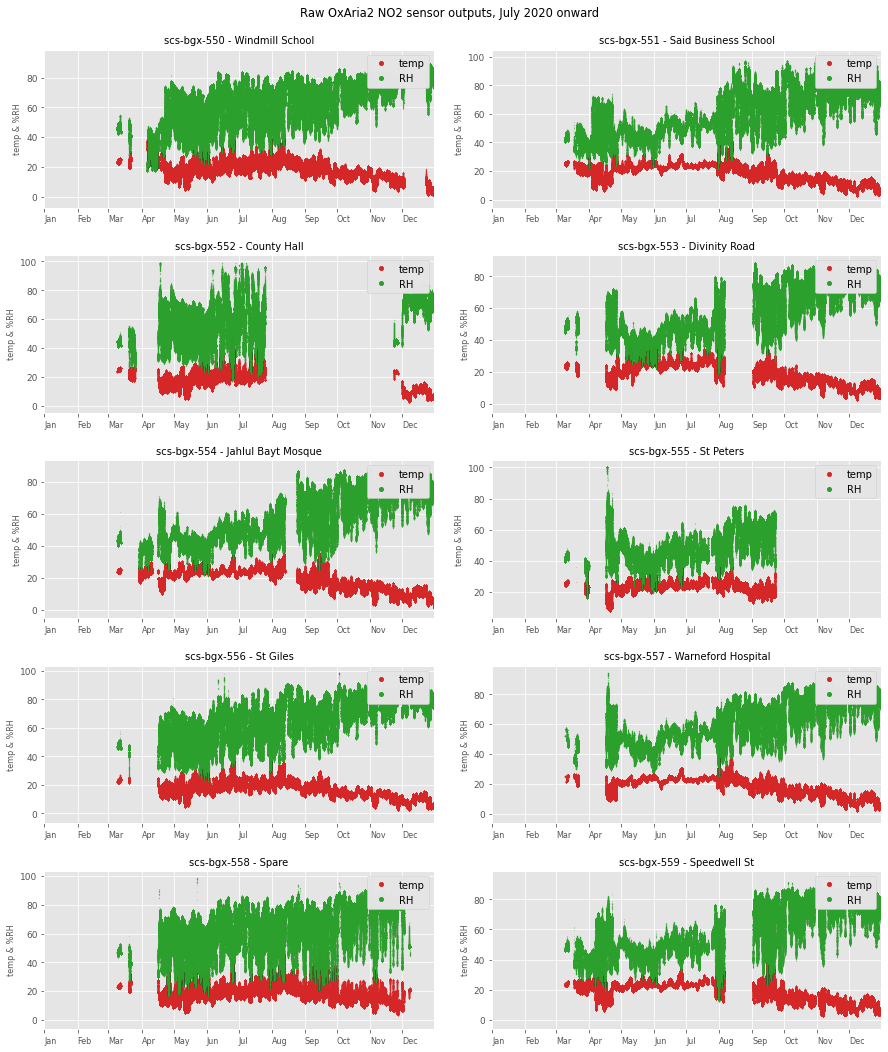

In [35]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_gases.iloc[:, [4,5,6]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2020,12,31)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria2 NO2 sensor outputs, July 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.sht.tmp', c='tab:red',linewidth=0.5, marker='o', ms=0.1, ls='', label='temp', ax=ax, \
             legend=True,zorder=1)
    dat.plot(y='val.sht.hmd', c='tab:green',linewidth=0.5, marker='o', ms=0.1, ls='', label='RH', ax=ax, \
             legend=True,zorder=1)    
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('temp & %RH', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right') 
    
#plt.savefig(pngs+'oxaria2_no2_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()
